In [ ]:
!pip install rasterio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 63.7 MB/s eta 0:00:00


In [ ]:
# Bibliotecas
import rasterio as rio
from rasterio.plot import reshape_as_image
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# Leitura dos arquivos
with rio.open("L71221071_07120010720_DN.tif") as src:
  img = src.read()
img = reshape_as_image(img)

In [ ]:
# Separando bandas 3 e 4
bd3 = img[...,2].flatten().reshape(-1, 1)
bd4 = img[...,3].flatten().reshape(-1, 1)

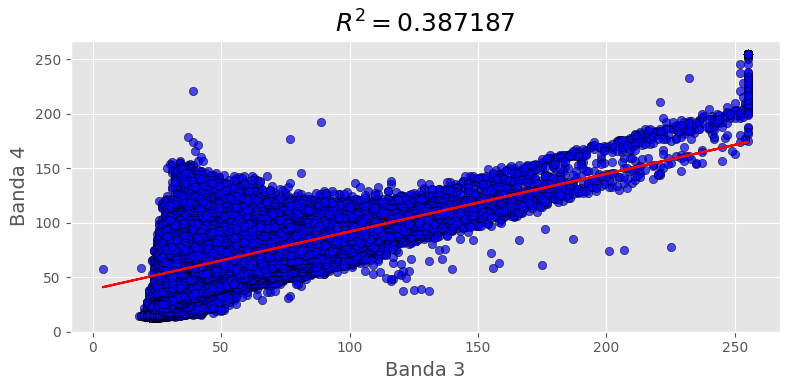

In [ ]:
# Calculando parâmetros da regressão
reg = linear_model.LinearRegression()
model = reg.fit(bd3, bd4)
reta = model.predict(bd3)
r2 = model.score(bd3, bd4)

# Visualizando resultado
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(bd3, reta, color='r')
ax.scatter(bd3, bd4, edgecolor='k', facecolor='blue', alpha=0.7)
ax.set_title('$R^2= %f$' % r2, fontsize=18)
ax.set_ylabel('Banda 4', fontsize=14)
ax.set_xlabel('Banda 3', fontsize=14)
fig.tight_layout()